## Visit the following link to access the colab notebook for this code

In [ ]:
# https://colab.research.google.com/drive/1XtrCJ3RFlOINj4gtR563CRNCVoE-UIlS?usp=sharing

## Importing Necessary Package and Downloading Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,ID,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,1,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,2,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,3,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,4,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,5,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


## Data Pre-processing

In [ ]:
df.shape

(1503, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   ID                                         1503 non-null   int64 
 1   Timestamp                                  1503 non-null   object
 2   Age                                        1503 non-null   object
 3   Feeling sad or Tearful                     1503 non-null   object
 4   Irritable towards baby & partner           1497 non-null   object
 5   Trouble sleeping at night                  1503 non-null   object
 6   Problems concentrating or making decision  1491 non-null   object
 7   Overeating or loss of appetite             1503 non-null   object
 8   Feeling anxious                            1503 non-null   object
 9   Feeling of guilt                           1494 non-null   object
 10  Problems of bonding with baby       

In [ ]:
columns_to_drop = ['ID', 'Timestamp']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
df.isnull().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [ ]:
df.shape

(1491, 10)

In [ ]:
df["Feeling anxious"].value_counts()

Feeling anxious
Yes    968
No     523
Name: count, dtype: int64

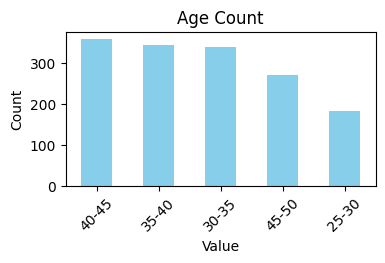

Age


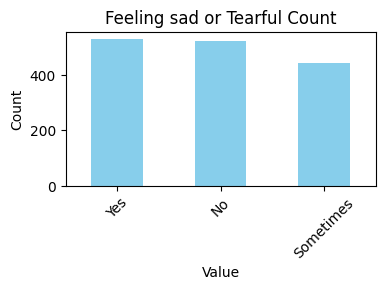

Feeling sad or Tearful


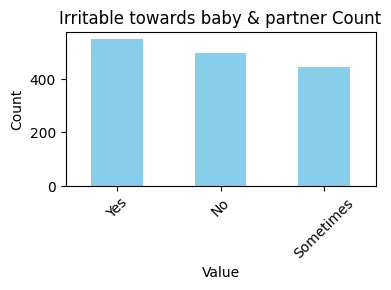

Irritable towards baby & partner


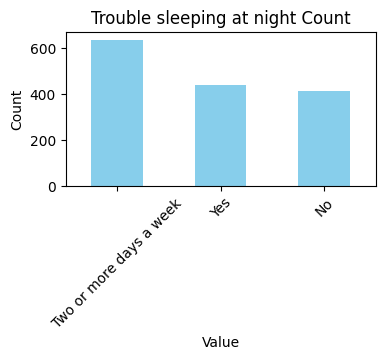

Trouble sleeping at night


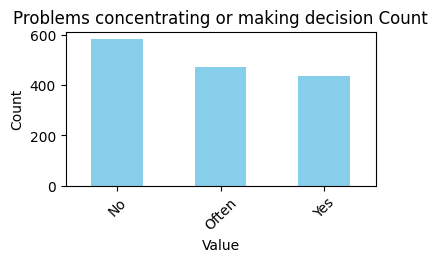

Problems concentrating or making decision


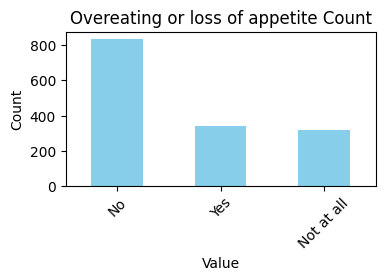

Overeating or loss of appetite


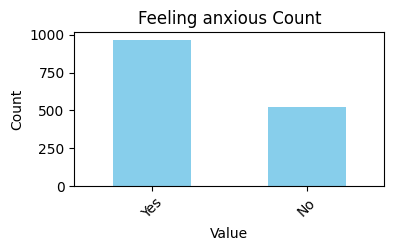

Feeling anxious


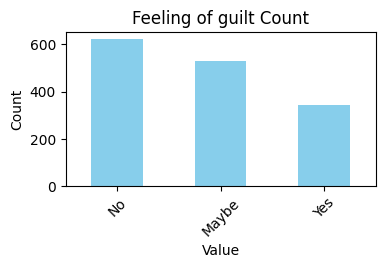

Feeling of guilt


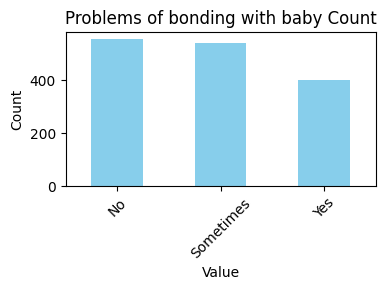

Problems of bonding with baby


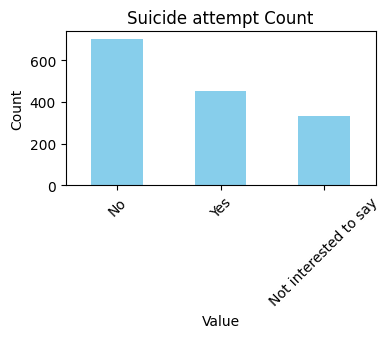

Suicide attempt


In [ ]:
cols = df.columns
for col in cols:
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100

    plt.figure(figsize=(4, 2))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'{col} Count')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    table_data = []
    for index, count in counts.items():
        percentage = f"{percentages[index]:.6f} %"
        table_data.append([index, count, percentage])
    print(col)

In [ ]:
df.columns.tolist()

['Age',
 'Feeling sad or Tearful',
 'Irritable towards baby & partner',
 'Trouble sleeping at night',
 'Problems concentrating or making decision',
 'Overeating or loss of appetite',
 'Feeling anxious',
 'Feeling of guilt',
 'Problems of bonding with baby',
 'Suicide attempt']

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt']
Numerical Variables:
[]


## Encoding and Correlation

In [ ]:
label_encoder = LabelEncoder()
columns_to_encode = ['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt']
df[columns_to_encode] = df[columns_to_encode].apply(label_encoder.fit_transform)

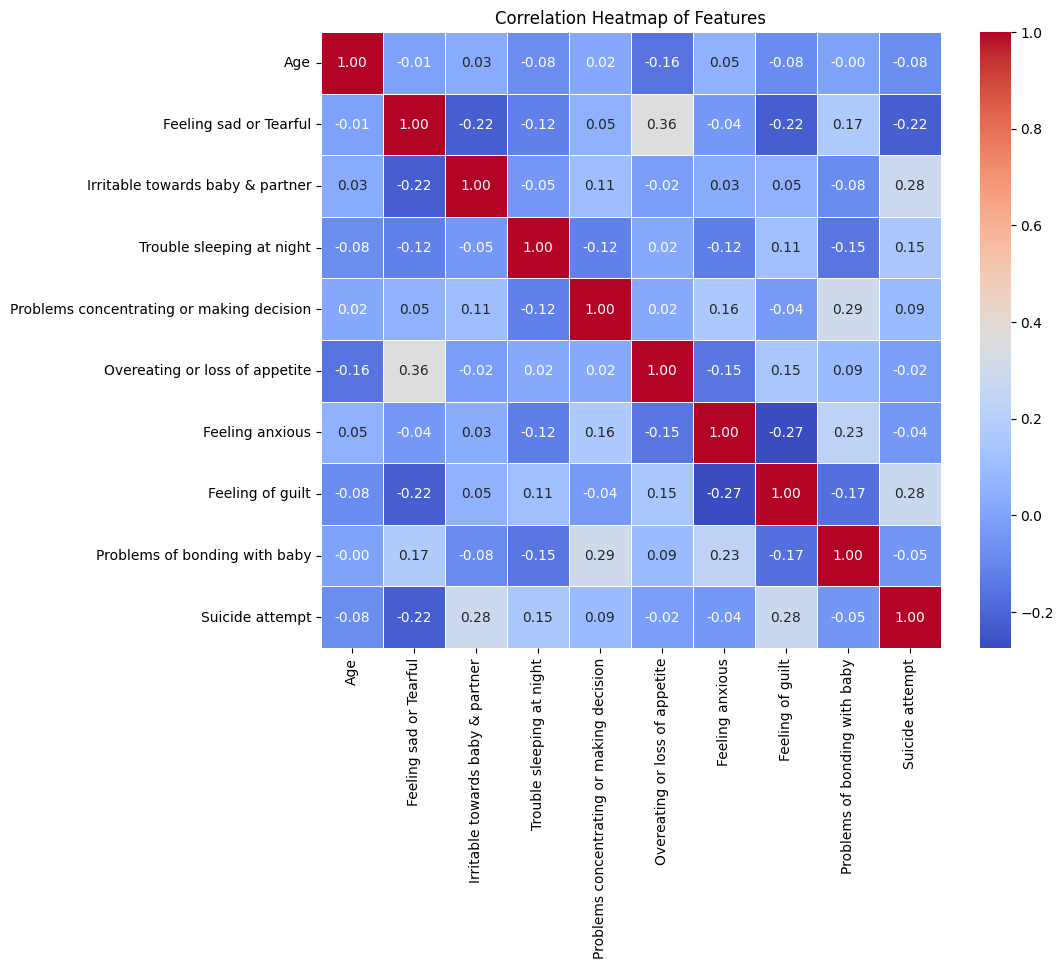

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

##Spiliting Data

In [ ]:
y = df['Feeling anxious']  # Target variable
X = df.drop(columns=['Feeling anxious'])  # Features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Prediction and Plotting

In [ ]:
# Initialize classifiers
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
nb = GaussianNB()
lr = LogisticRegression()

# Train classifiers
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predictions
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
dt_pred = dt.predict(X_test)
nb_pred = nb.predict(X_test)
lr_pred = lr.predict(X_test)

In [ ]:
# Function to calculate evaluation metrics and display confusion matrix
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")


# Evaluate each model
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")
evaluate_model(y_test, svm_pred, "Support Vector Machine")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, nb_pred, "Naive Bayes")
evaluate_model(y_test, lr_pred, "Logistic Regression")

Model: K-Nearest Neighbors
Accuracy: 0.9084821428571429
Precision: 0.9083443230794224
Recall: 0.9084821428571429
F1 Score: 0.9084082884318304
Confusion Matrix:
[[131  21]
 [ 20 276]]


Model: Support Vector Machine
Accuracy: 0.9151785714285714
Precision: 0.9163044833821787
Recall: 0.9151785714285714
F1 Score: 0.9155651845677167
Confusion Matrix:
[[136  16]
 [ 22 274]]


Model: Decision Tree
Accuracy: 0.9665178571428571
Precision: 0.9683038116764303
Recall: 0.9665178571428571
F1 Score: 0.9667855093844766
Confusion Matrix:
[[150   2]
 [ 13 283]]


Model: Naive Bayes
Accuracy: 0.765625
Precision: 0.7592791805363861
Recall: 0.765625
F1 Score: 0.7542537786224999
Confusion Matrix:
[[ 78  74]
 [ 31 265]]


Model: Logistic Regression
Accuracy: 0.7433035714285714
Precision: 0.7385680718568419
Recall: 0.7433035714285714
F1 Score: 0.7200685368171585
Confusion Matrix:
[[ 61  91]
 [ 24 272]]




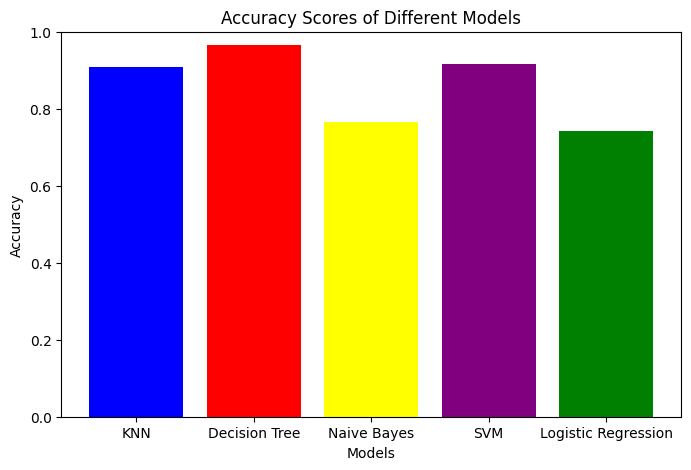

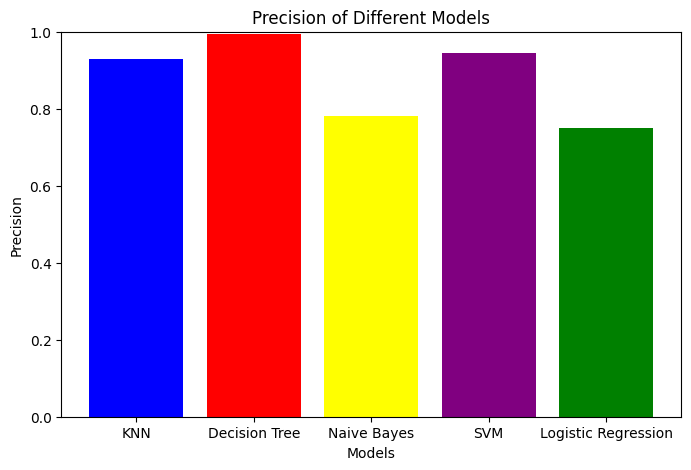

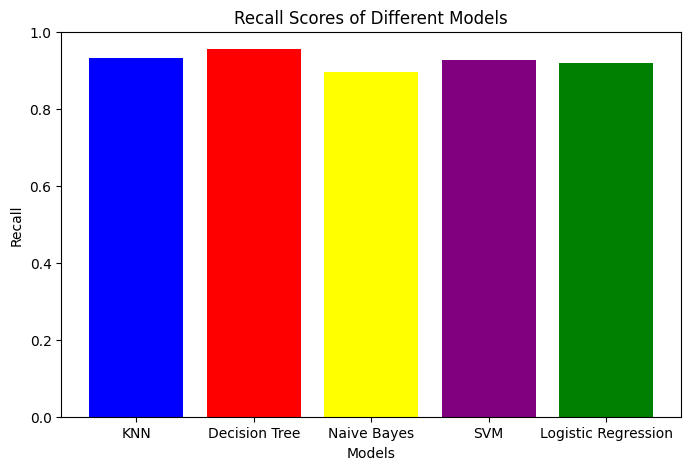

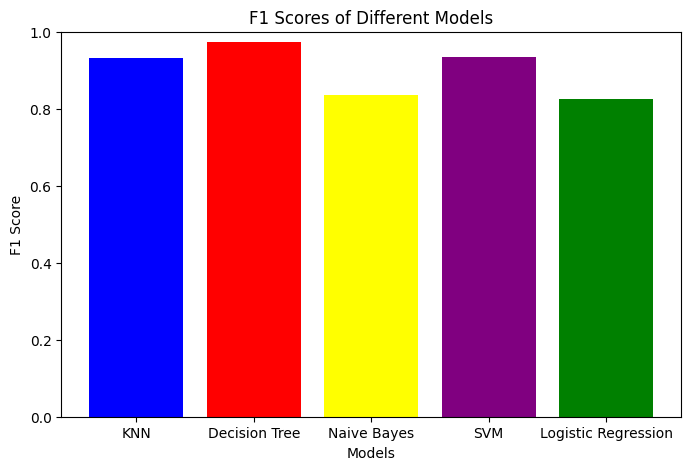

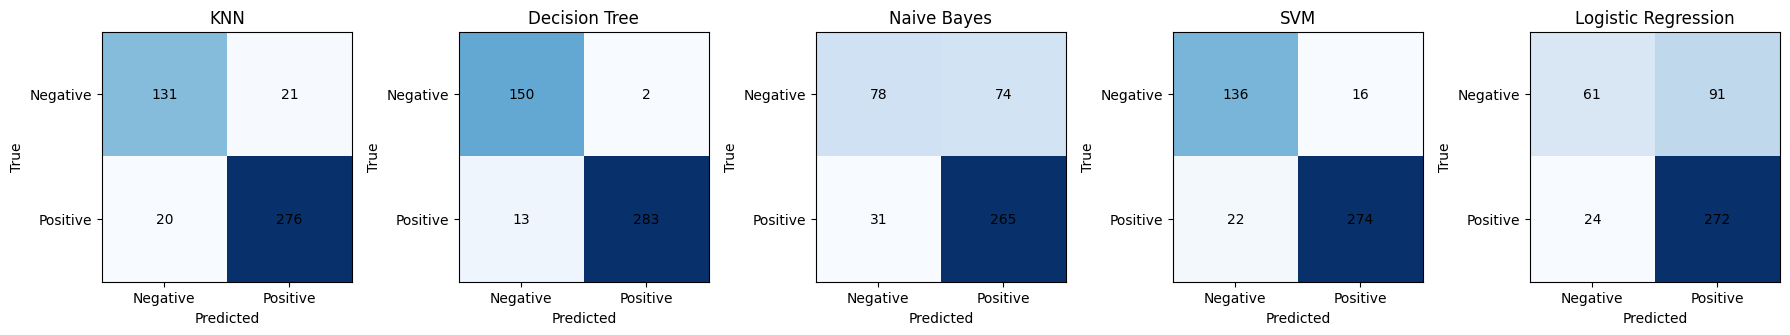

In [ ]:
# Calculate accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, knn_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, nb_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, lr_pred)]

# Calculate precision scores for each model
precision_scores = [precision_score(y_test, knn_pred), precision_score(y_test, dt_pred), precision_score(y_test, nb_pred), precision_score(y_test, svm_pred), precision_score(y_test, lr_pred)]

# Calculate recall scores for each model
recall_scores = [recall_score(y_test, knn_pred), recall_score(y_test, dt_pred), recall_score(y_test, nb_pred), recall_score(y_test, svm_pred), recall_score(y_test, lr_pred)]

# Calculate F1 scores for each model
f1_scores = [f1_score(y_test, knn_pred), f1_score(y_test, dt_pred), f1_score(y_test, nb_pred), f1_score(y_test, svm_pred), f1_score(y_test, lr_pred)]

# Calculate confusion matrix for each model
conf_matrices = [confusion_matrix(y_test, knn_pred), confusion_matrix(y_test, dt_pred), confusion_matrix(y_test, nb_pred), confusion_matrix(y_test, svm_pred), confusion_matrix(y_test, lr_pred)]

# Plotting bar chart for accuracy
plt.figure(figsize=(8, 5))
models = ['KNN', 'Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression']
colors = ['blue', 'red', 'yellow', 'purple', 'green']
plt.bar(models, accuracy_scores, color=colors)
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plotting bar chart for precision
plt.figure(figsize=(8, 5))
plt.bar(models, precision_scores, color=colors)
plt.title('Precision of Different Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.show()

# Plotting bar chart for recall
plt.figure(figsize=(8, 5))
plt.bar(models, recall_scores, color=colors)
plt.title('Recall Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()

# Plotting bar chart for F1 score
plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores, color=colors)
plt.title('F1 Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

# Plotting confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(18, 4))
for i, conf_matrix in enumerate(conf_matrices):
    labels = ['Negative', 'Positive']  # Assuming binary classification
    ax = axes[i]
    ax.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    ax.set_title(models[i])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    for x in range(len(labels)):
        for y in range(len(labels)):
            ax.text(y, x, conf_matrix[x, y], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()
